In [1]:
import numpy as np
import matplotlib.pyplot as  plt

# Sum

## Emap

In [2]:
# theoretical QFI
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('sum/rixs_Emap.npz')
rixs_con = np.load('sum/conjugate_rixs_Emap.npz')
rixs = dict(rixs)
rixs_pos = rixs['rixs']
rixs_con = dict(rixs_con)
rixs_neg = rixs_con['rixs']

omega = (rixs['omega']+11774.5) / 1000
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs_pos.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand_pos = rixs_pos * factor_reshaped
summand_neg = rixs_neg * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand_pos_chooser = summand_pos[:,chooser]
summand_neg_chooser = summand_neg[:,chooser]
nominator_pos = np.sum(summand_pos_chooser, axis=1)*step
nominator_neg = np.sum(summand_neg_chooser, axis=1)*step
nominator = nominator_pos + nominator_neg

# threshold
FQ_Emap = dict(np.load('sum/FQ_Emap.npz'))
FQ = FQ_Emap['FQ']

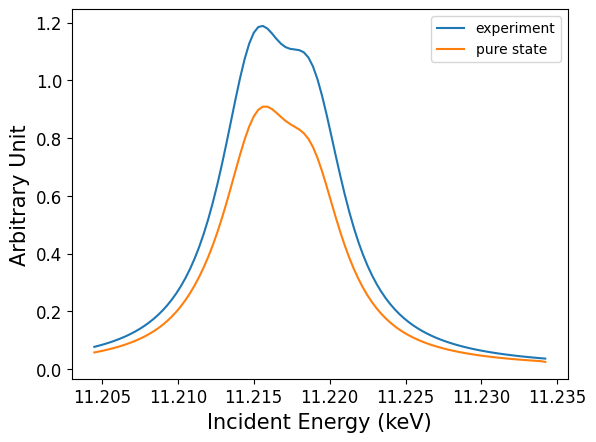

In [3]:
plt.plot(omega, nominator, label='experiment')
plt.plot(omega, FQ, label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

In [4]:
# experimental QFI
Emap_data = dict(eloss=[], omega=[], intensity=[], yerr=[])
for scan_no in [121, 134, 135, 136, 137, 138, 140, 141]:
    scan = dict(np.load(f'../data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    Emap_data['omega'].append(float(scan['Ei']))
    eloss = np.array((scan['x']-scan['xoffset'])/1000)
    choose = eloss > 0.5
    Emap_data['eloss'].append(eloss[choose])
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    intensity = np.array((scan['y']-bg)/scan['ab_factor'])
    Emap_data['intensity'].append(intensity[choose])
    yerr = np.array(scan['yerr']/scan['ab_factor'])
    Emap_data['yerr'].append(yerr[choose])

omega_data = np.array(Emap_data['omega'])

nominator_pos_data = []
nominator_err = []

for i in range(len(Emap_data['intensity'])):
    rixs_data = np.array(Emap_data['intensity'][i])
    eloss_data = np.array(Emap_data['eloss'][i])
    factor_data = 2 * np.tanh(beta * eloss_data / 2) * (1-np.exp(-beta * eloss_data) )
    step_data = np.round(eloss_data[1]-eloss_data[0],2)
    summand_data = rixs_data * factor_data * step_data
    sum_data = np.sum(summand_data)
    err_data = Emap_data['yerr'][i]
    err_data = err_data * factor_data * step_data
    err = np.sqrt(np.sum(err_data ** 2))
    nominator_pos_data.append(sum_data)
    nominator_err.append(err)

nominator_pos_data = np.array(nominator_pos_data)
nominator_err = np.array(nominator_err)
choose = [25, 28, 32, 35, 38, 42, 45, 48]
nominator_neg_data = nominator_neg[choose]
nominator_data = nominator_pos_data/4 + nominator_neg_data

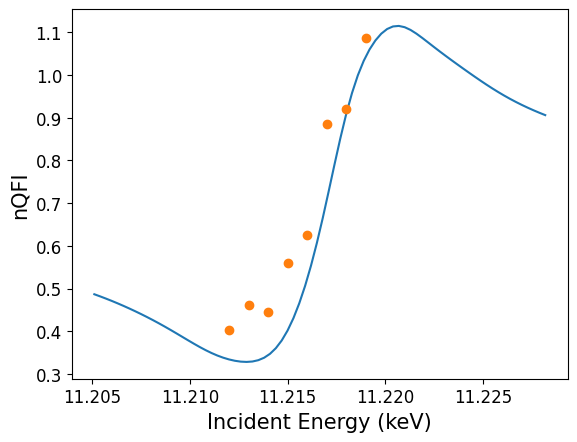

In [5]:
plt.plot(omega[2:80], nominator_pos[2:80]/FQ[2:80])
plt.plot(omega_data, nominator_pos_data/(4*FQ[choose]), 'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('nQFI', fontsize=15)
plt.show()

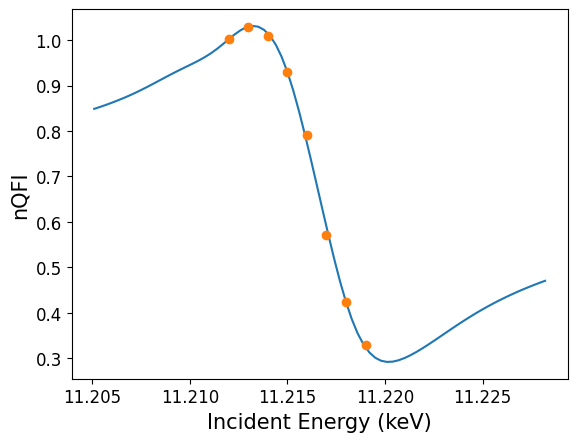

In [6]:
plt.plot(omega[2:80], nominator_neg[2:80]/FQ[2:80])
plt.plot(omega_data, nominator_neg_data/FQ[choose], 'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('nQFI', fontsize=15)
plt.show()

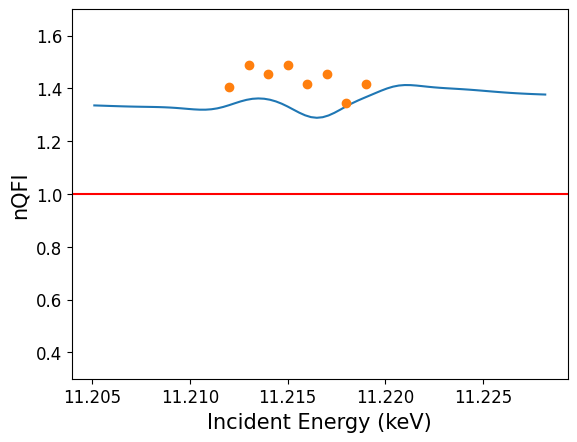

In [7]:
plt.plot(omega[2:80], nominator[2:80]/FQ[2:80])
plt.plot(omega_data, nominator_data/FQ[choose], 'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('nQFI', fontsize=15)
plt.ylim(0.3,1.7)
plt.axhline(1, color='r')
plt.show()

## Mmap

In [8]:
# theoretical QFI
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('sum/rixs_Mmap.npz')
rixs_con = np.load('sum/conjugate_rixs_Mmap.npz')
rixs = dict(rixs)
rixs_pos = rixs['rixs']
rixs_con = dict(rixs_con)
rixs_neg = rixs_con['rixs']

d = 2.53614
Lfactor = 0.426991866 * d / (2*np.pi)
Ls = np.arange(0.0, 20.1, 0.1)
momenta = rixs['momenta']
newmomenta = Ls * Lfactor
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs_pos.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand_pos = rixs_pos * factor_reshaped
summand_neg = rixs_neg * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand_pos_chooser = summand_pos[:,chooser]
summand_neg_chooser = summand_neg[:,chooser]
nominator_pos = np.sum(summand_pos_chooser, axis=1)*step
nominator_neg = np.sum(summand_neg_chooser, axis=1)*step
nominator = nominator_pos + nominator_neg

# threshold
FQ_Mmap = dict(np.load('sum/FQ_Mmap.npz'))
FQ = FQ_Mmap['FQ']

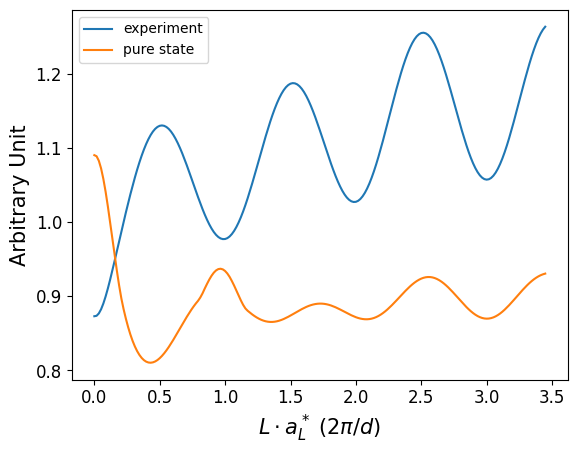

In [9]:
plt.plot(newmomenta, nominator, label='experiment')
plt.plot(newmomenta, FQ, label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

In [10]:
# experimental QFI
Mmap_data = dict(eloss=[], L=[], intensity=[], yerr=[])
for scan_no in np.hstack([np.arange(147,156),157,np.arange(160,163),164]):
    scan = dict(np.load(f'../data_Ba3CeIr2O9/scan_{scan_no}.npz'))
    Mmap_data['L'].append(round(scan['HKL'][2],1)*Lfactor)
    eloss = np.array((scan['x']-scan['xoffset'])/1000)
    choose = eloss > 0.5
    Mmap_data['eloss'].append(eloss[choose])
    bg = np.mean(scan['y'][np.logical_and(scan['x']>=250., scan['x']<=350.)])
    intensity = np.array((scan['y']-bg)/scan['ab_factor'])
    Mmap_data['intensity'].append(intensity[choose])
    yerr = np.array(scan['yerr']/scan['ab_factor'])
    Mmap_data['yerr'].append(yerr[choose])

momenta_data = np.array(Mmap_data['L'])

nominator_pos_data = []
nominator_err = []

for i in range(len(Mmap_data['intensity'])):
    rixs1_data = np.array(Mmap_data['intensity'][i])
    eloss_data = np.array(Mmap_data['eloss'][i])
    factor_data = 2 * np.tanh(beta * eloss_data / 2) * (1-np.exp(-beta * eloss_data) )
    step_data = np.round(eloss_data[1]-eloss_data[0],2)
    summand1_data = rixs1_data * factor_data * step_data
    sum_data = np.sum(summand1_data)
    err_data = Mmap_data['yerr'][i]
    err_data = err_data * factor_data * step_data
    err = np.sqrt(np.sum(err_data ** 2))
    nominator_pos_data.append(sum_data)
    nominator_err.append(err)


nominator_pos_data = np.array(nominator_pos_data)
nominator_err = np.array(nominator_err)
choose = np.array([8,18,27,37,47,57,66,76,86,95,105,115,125,134])+60
nominator_neg_data = nominator_neg[choose]
nominator_data = nominator_pos_data/1.7 + nominator_neg_data

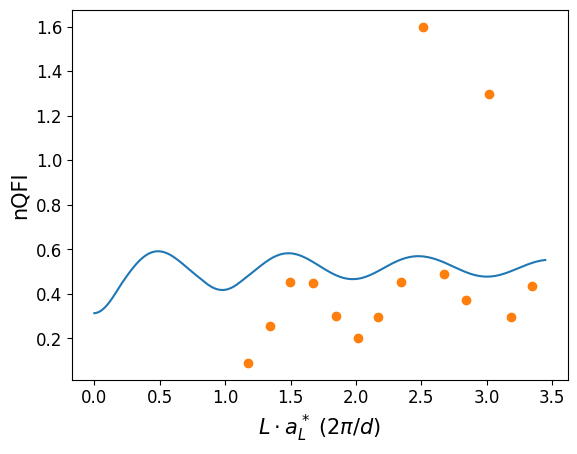

In [11]:
plt.plot(newmomenta, nominator_pos/FQ)
plt.plot(momenta_data, nominator_pos_data/(1.7*FQ[choose]), 'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('nQFI', fontsize=15)
plt.show()

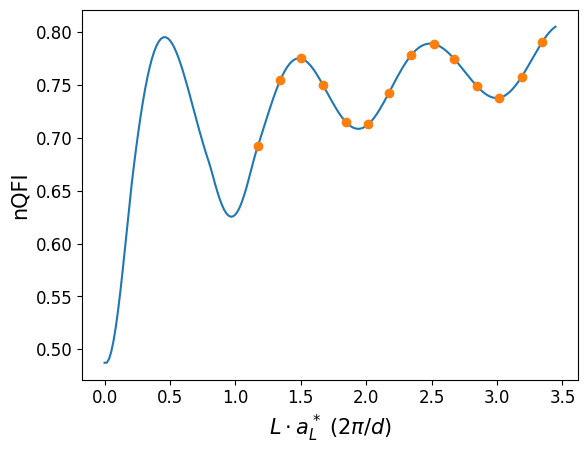

In [12]:
plt.plot(newmomenta, nominator_neg/FQ)
plt.plot(momenta_data, nominator_neg_data/FQ[choose], 'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('nQFI', fontsize=15)
plt.show()

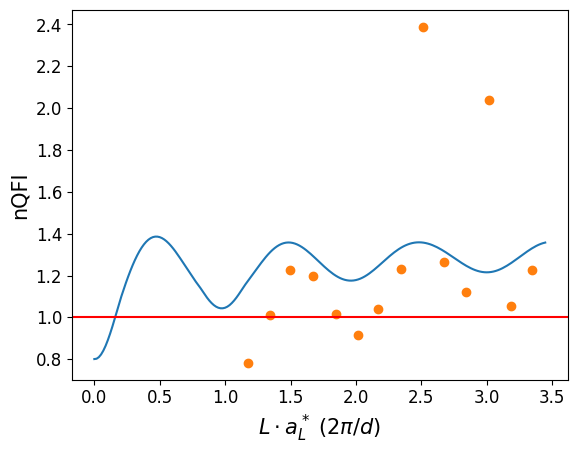

In [13]:
plt.plot(newmomenta, nominator/FQ)
plt.plot(momenta_data, nominator_data/FQ[choose], 'o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('nQFI', fontsize=15)
plt.axhline(1, color='r')
plt.show()

# Polarization

## Emap

In [14]:
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

rixs = np.load('pol/rixs_Emap.npz')
rixs_con = np.load('pol/conjugate_rixs_Emap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs'][0]
rixs2 = rixs['rixs'][1]
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs'][0]
rixs2_con = rixs_con['rixs'][1]

omega = (rixs['omega']+11774.5) / 1000
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand1 = rixs1 * factor_reshaped + rixs1_con * factor_reshaped
summand2 = rixs2 * factor_reshaped + rixs2_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand1_chooser = summand1[:,chooser]
summand2_chooser = summand2[:,chooser]
nominator1 = np.sum(summand1_chooser, axis=1)*step
nominator2 = np.sum(summand2_chooser, axis=1)*step

# threshold
FQ_Emap = dict(np.load('pol/FQ_Emap.npz'))
FQ = FQ_Emap['FQ']

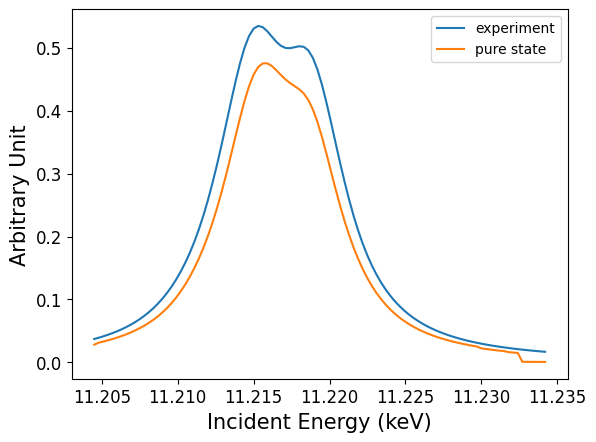

In [15]:
plt.plot(omega, nominator1, label='experiment')
plt.plot(omega, FQ[0], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

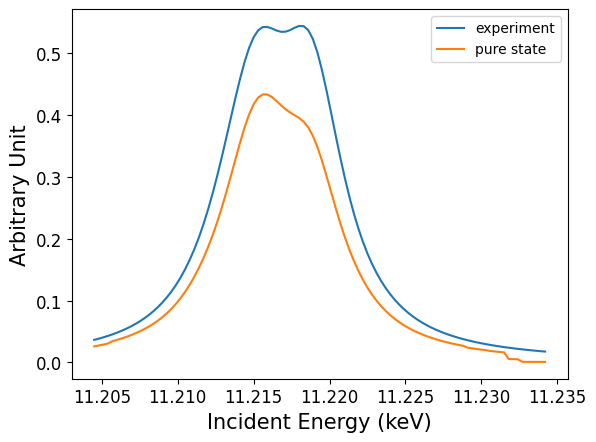

In [16]:
plt.plot(omega, nominator2, label='experiment')
plt.plot(omega, FQ[1], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'Incident Energy (keV)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

## Mmap

In [17]:
# temperature
T=9.
kB=8.6173303e-5
beta = 1 / (kB * T)

# rixs = np.load(witness.folder+'/rixs_Emap.npz')
rixs = np.load('pol/rixs_Mmap.npz')
rixs_con = np.load('pol/conjugate_rixs_Mmap.npz')
rixs = dict(rixs)
rixs1 = rixs['rixs'][:,0,:]
rixs2 = rixs['rixs'][:,1,:]
rixs_con = dict(rixs_con)
rixs1_con = rixs_con['rixs'][:,0]
rixs2_con = rixs_con['rixs'][:,1]

momenta = rixs['momenta']
eloss = rixs['eloss']
factor = 2 * np.tanh(beta * eloss / 2) * (1-np.exp(-beta * eloss) )

# element-wise multiplication along axis 'eloss'
given_axis = 1
dim = np.ones((1,rixs1.ndim),int).ravel()
dim[given_axis] = -1
factor_reshaped = factor.reshape(dim)
summand1 = rixs1 * factor_reshaped + rixs1_con * factor_reshaped
summand2 = rixs2 * factor_reshaped + rixs2_con * factor_reshaped

# integration over eloss to get nominator
step = eloss[1] - eloss[0]

chooser = eloss > 0.5
summand1_chooser = summand1[:,chooser]
summand2_chooser = summand2[:,chooser]
nominator1 = np.sum(summand1_chooser, axis=1)*step
nominator2 = np.sum(summand2_chooser, axis=1)*step

# threshold
FQ_Emap = dict(np.load('pol/FQ_Mmap.npz'))
FQ = FQ_Emap['FQ']

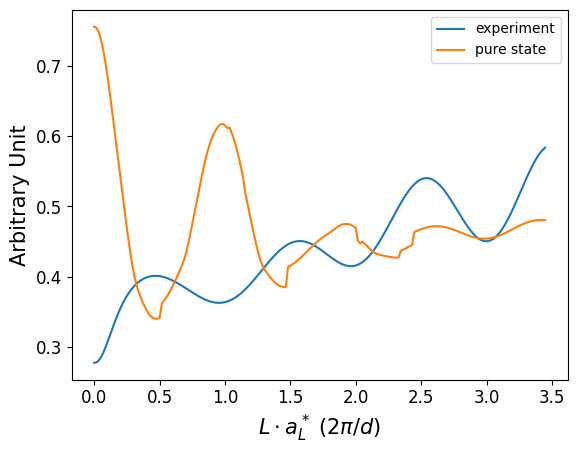

In [18]:
plt.plot(newmomenta, nominator1, label='experiment')
plt.plot(newmomenta, FQ[0], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()

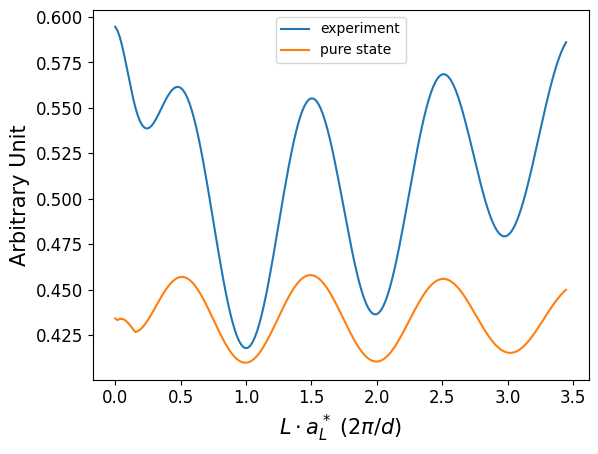

In [19]:
plt.plot(newmomenta, nominator2, label='experiment')
plt.plot(newmomenta, FQ[1], label='pure state')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$L\cdot a^*_L$ ($2\pi/d$)',fontsize=15)
plt.ylabel('Arbitrary Unit', fontsize=15)
plt.legend()
plt.show()